In [2]:
# This cell just imports relevant modules

import numpy
import pylab
from math import pi
from sympy import sin, cos, Function, Symbol, diff, integrate, matrices
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
###### TRANSFORMATION MATRICES ######
###### Lecture 5, slide 9 ######

# Define the transformation matrix in Python using numpy.matrix
mD = numpy.matrix([[1.25, 0],
                  [0, 0.8]])
           
# A list of coordinate vectors in the form [x,y]. 
# These are stored as numpy arrays so we can easily multiply them 
# by the transformation matrix.
vCoordinates = [numpy.array([1, 0]),
               numpy.array([0, 1]),
               numpy.array([-1, 0]),
               numpy.array([0, -1])]

# Take each coordinate and transform it
for i in range(0, len(vCoordinates)):
    # We need to reshape the array so it is conformable
    # (i.e. it is of the right dimension for matrix-vector
    # multiplication). In this case, we need it to be 2 x 1.
    vCoordinates[i] = numpy.reshape(vCoordinates[i], (2,1))
    print(mD*vCoordinates[i]) 
   
sDet = numpy.linalg.det(mD)
sVolStrain = sDet - 1 # The volumetric strain

print("Determinant of D is: %f" % sDet) 
print("This implies:") 
if(sVolStrain == 1):
    print("No volume change") 
elif(sVolStrain > 1):
    print("Increase in volume") 
elif(sVolStrain > 0 and sVolStrain < 1):
    print("Decrease in volume") 
else:
    print("No geological meaning") 

In [ ]:
###### EIGENVALUES OF A 2 x 2 MATRIX ######
###### Lecture 5, slide 18 ######
mA = numpy.matrix([[1,4],
                  [1,1]]) 
                  
# A simple way of finding eigenvalues is to use 
# the eigvals function.
sEigValues = numpy.linalg.eigvals(mA)
print("The eigenvalues of mA are: ", sEigValues) 
             
# Alternatively, we could work out the characteristic polynomial
# for lambda, and then find the roots.
# Computes det(mA - sLambda*mI) and returns a list of scalar coefficients [sX,sY,sZ] for 
# the characteristic polynomial sX*sLambda**2 + sY*sLambda + sZ
sCharacteristicPoly = numpy.poly(mA)
print("The characteristic polynomial of mA is: (%f*lambda**2) + (%f*lambda) + (%f)" 
      % (sCharacteristicPoly[0], sCharacteristicPoly[1], sCharacteristicPoly[2])) 
# Finds the roots (in this case, these will be the eigenvalues)
sRoots = numpy.roots(sCharacteristicPoly)
print("The roots of the characteristic polynomial are: ", sRoots) 

In [ ]:
###### EIGENVECTORS OF A 2 x 2 MATRIX ######
###### Lecture 5, slide 20 ######
mA = numpy.matrix([[1,4],
                  [1,1]]) 
                  
# A simple way of finding eigenvectors is to use 
# the eig function. Note that this gives BOTH the eigenvalues in an array (say 'sEigValues')
# AND eigenvectors in a matrix data type (say 'vEigVectors'). The i-th eigenvector, stored in the column vEigVectors[:,i], 
# corresponds to the eigenvalue stored in sEigValues[i].
(sEigValues, vEigVectors) = numpy.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

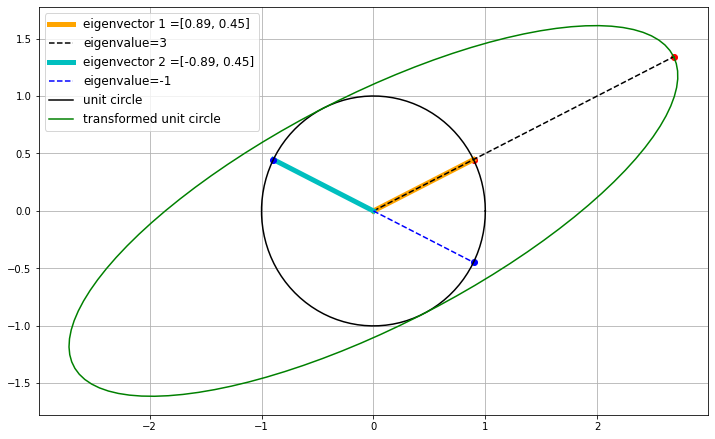

The two eigenvectors are perpendicular: False


In [20]:
mA = numpy.array([[1,4],[1,1]]) 

(sEigValues, vEigVectors) = numpy.linalg.eig(mA)

sp1 = numpy.array([vEigVectors[0][0], vEigVectors[1][0]])
tsp1 = mA @ sp1 

sp2 = numpy.array([vEigVectors[0][1], vEigVectors[1][1]])
tsp2 = mA @ sp2

u=0.       #x-position of the center
v=0.      #y-position of the center
a=abs(sEigValues[0])       #radius on the x-axis
b=abs(sEigValues[1])      #radius on the y-axis
t_rot=numpy.arctan(vEigVectors[1][0]/vEigVectors[0][0]) #rotation angle

t = numpy.linspace(0, 2*pi, 100)
Ell = numpy.array([a*numpy.cos(t) , b*numpy.sin(t)])  
     #u,v removed to keep the same center location
R_rot = numpy.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = numpy.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = R_rot @ Ell[:,i]

plt.figure(figsize=(12,7.5))
plt.plot(sp1[0], sp1[1], 'ro')
plt.plot(tsp1[0], tsp1[1], 'ro')
plt.plot([0, sp1[0]], [0, sp1[1]], 'orange', label='eigenvector 1 =[0.89, 0.45]', linewidth=5)
plt.plot([0, tsp1[0]], [0, tsp1[1]], 'k--', label='eigenvalue=3')
plt.plot([0, sp2[0]], [0, sp2[1]], 'c', label='eigenvector 2 =[-0.89, 0.45]', linewidth=5)
plt.plot([0, tsp2[0]], [0, tsp2[1]], 'b--', label='eigenvalue=-1')
plt.plot(sp2[0], sp2[1], 'bo')
plt.plot(tsp2[0], tsp2[1], 'bo')
plt.plot(numpy.cos(t), numpy.sin(t), 'k', label='unit circle')
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'g', label='transformed unit circle')
plt.grid('True')
plt.legend(loc='best', fontsize=12)
plt.show()

print("The two eigenvectors are perpendicular:", numpy.allclose(sp1@sp2, 0))

In [ ]:
###### REPEATED EIGENVALUES ######
###### Lecture 5, slide 24 ######
mA = numpy.matrix([[1,0],
                  [0,1]]) 
#NOTE: Here we could also define mA using numpy.identity(2).

#NOTE: NumPy will give ALL eigenvalues, including the repeated ones.
(sEigValues, vEigVectors) = numpy.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

In [ ]:
###### REAL AND COMPLEX EIGENVALUES ######
###### Lecture 5, slide 28 ######
mA = numpy.matrix([[0,1],
                  [-1,0]]) 
# NumPy prints out complex numbers in the form c = a + bj, where j is the imaginary number.
# We can use numpy.real(c) and numpy.imag(c) to print the real and imaginary parts respectively.
sEigValues = numpy.linalg.eigvals(mA) 
print("The eigenvalues of A are: ", sEigValues) 
print("The real part of the first eigenvalue is: %f" % numpy.real(sEigValues[0])) 
print("The imaginary part of the first eigenvalue is: %f" % numpy.imag(sEigValues[0])) 

In [ ]:
###### EXAMPLE EIGENVALUE PROBLEM ######
###### Lecture 5, slide 30 ######
mM = numpy.matrix([[3,-1],
                  [-1,3]])
(sEigValues, vEigVectors) = numpy.linalg.eig(mA)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 

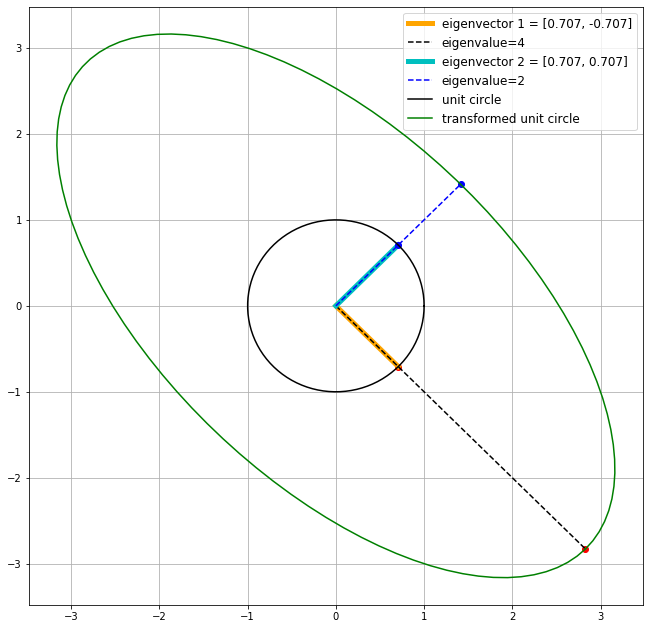

The two eigenvectors are perpendicular: True


In [19]:
mM = numpy.array([[3,-1],[-1,3]])

(sEigValues, vEigVectors) = numpy.linalg.eig(mM)

sp1 = numpy.array([vEigVectors[0][0], vEigVectors[1][0]])
tsp1 = mM @ sp1 

sp2 = numpy.array([vEigVectors[0][1], vEigVectors[1][1]])
tsp2 = mM @ sp2

u=0.       #x-position of the center
v=0.      #y-position of the center
a=abs(sEigValues[0])       #radius on the x-axis
b=abs(sEigValues[1])      #radius on the y-axis
t_rot=numpy.arctan(vEigVectors[1][0]/vEigVectors[0][0]) #rotation angle

t = numpy.linspace(0, 2*pi, 100)
Ell = numpy.array([a*numpy.cos(t) , b*numpy.sin(t)])  
     #u,v removed to keep the same center location
R_rot = numpy.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = numpy.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = R_rot @ Ell[:,i]

plt.figure(figsize=(11,11))
plt.plot(sp1[0], sp1[1], 'ro')
plt.plot(tsp1[0], tsp1[1], 'ro')
plt.plot([0, sp1[0]], [0, sp1[1]], 'orange', label='eigenvector 1 = [0.707, -0.707]', linewidth=5)
plt.plot([0, tsp1[0]], [0, tsp1[1]], 'k--', label='eigenvalue=4')
plt.plot([0, sp2[0]], [0, sp2[1]], 'c', label='eigenvector 2 = [0.707, 0.707]', linewidth=5)
plt.plot([0, tsp2[0]], [0, tsp2[1]], 'b--', label='eigenvalue=2')
plt.plot(sp2[0], sp2[1], 'bo')
plt.plot(tsp2[0], tsp2[1], 'bo')
plt.plot(numpy.cos(t), numpy.sin(t), 'k', label='unit circle')
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'g', label='transformed unit circle')
plt.grid('True')
plt.legend(loc='best', fontsize=12)
plt.show()

print("The two eigenvectors are perpendicular:", numpy.allclose(sp1@sp2, 0))

In [ ]:
###### SYMMETRIC MATRICES ######
###### Lecture 5, slide 31 ######
mNonSymmetric = numpy.matrix([[1,4],
                              [1,1]])
                              
(sEigValues, vEigVectors) = numpy.linalg.eig(mNonSymmetric)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 
# NOTE 1: Unfortunately, because referencing a column of the matrix vEigVectors
# also returns another matrix data type (essentially a 'sub-matrix' of vEigVectors),
# we cannot use the numpy.dot function (which only operates on vectors/1D arrays).
# Instead, we'll simply use numpy.transpose to perform the dot product instead.
# NOTE 2: could also use numpy.vdot - read the documentation for more info.
print("The dot product of the two eigenvectors is: ", float(numpy.transpose(vEigVectors[:,0])*vEigVectors[:,1])) 

mSymmetric = numpy.matrix([[3,-1],
                           [-1,3]])
                              
(sEigValues, vEigVectors) = numpy.linalg.eig(mSymmetric)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 
# The dot product should be zero here, as the two eigenvectors are orthogonal
# for any symmetric matrix. 
print("The dot product of the two eigenvectors is: ", float(numpy.transpose(vEigVectors[:,0])*vEigVectors[:,1])) 

In [ ]:
###### EIGENVALUE PROBLEM FOR A 3 x 3 MATRIX ######
###### Lecture 5, slide 37 ######
mM = numpy.matrix([[2,2,1],
                   [1,3,1],
                   [1,2,2]])
(sEigValues, vEigVectors) = numpy.linalg.eig(mM)
for i in range(0, len(sEigValues)):
    print("Eigenvalue #", str(i+1), " is: ", sEigValues[i]) 
    print("The corresponding eigenvector is:\n", vEigVectors[:,i]) 
## NOTE: If the values of x1, x2 or x3 are 'free' (i.e. can be chosen arbitrarily to obtain
## an independent eigenvector), NumPy does not necessarily choose values of 0 or 1, which
## is why the eigenvectors printed out here are different from those in your notes.
## They still satisfy the equation (A - lambda*I)x = 0 and are still independent eigenvectors.